<a href="https://colab.research.google.com/github/tomasrtml/pytorch/blob/main/00_pytorch_fundamentals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 00. PyTorch Fundamentals

Este notebook surgió se basa en lo mostrado en el curso "PyTorch for Deep Learning in 2023" de Zero to Mastery
- Resource notebook: https://www.learnpytorch.io/00_pytorch_fundamentals/

In [1]:
# El siguiente comando nos permite ver qué GPU nos asignó Google en nuestra sesión de colab
!nvidia-smi

Fri Feb 17 21:44:07 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 510.47.03    Driver Version: 510.47.03    CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   68C    P0    31W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
# Las librerías básicos que se usan a lo largo del curso
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

print(torch.__version__) # version de pytorch utilizada

1.13.1+cu116


# Introducción a los Tensores
Los tensores son arreglos multidimensionales de números utilizados por pytorch para codificar los datos de una manera en que se puedan usar para entrenar redes neuronales. Su diferenciación con los escalares, vectores y matrices se muestra en la siguiente imagen:

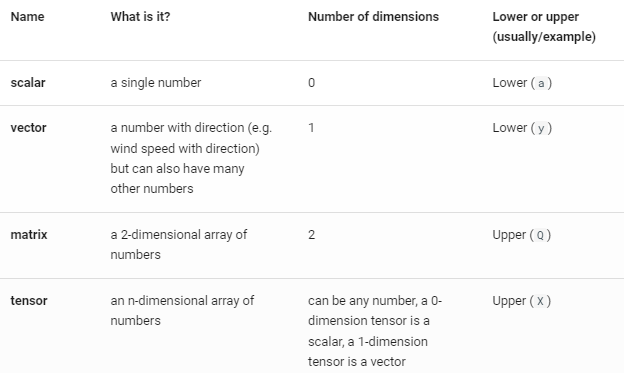

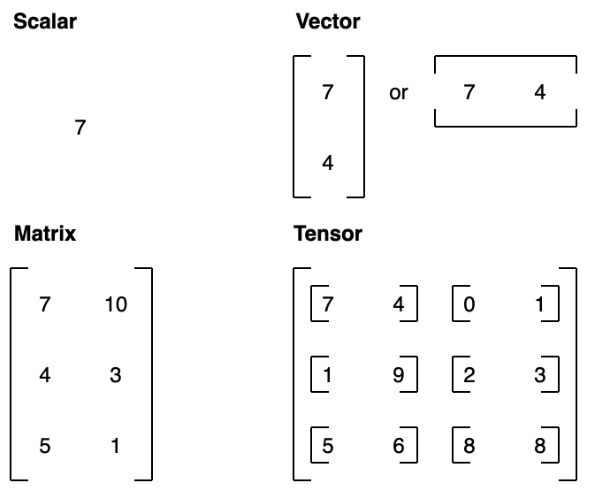

## Creando tensores

### Escalar
Se podrían considerar como arreglos de dimensión 0 compuestos tan solo por un número

In [5]:
# escalar de ejemplo con el valor 9
scalar = torch.tensor(9)
scalar

tensor(9)

Notar que se el escalar de la celda anterior se definió con la clase "tensor". Ésta es una de las más comunes en PyTorch, pues básicamente todo en PyTorch funciona en base a tensores. La documentación de esta clase es la siguiente: https://pytorch.org/docs/stable/tensors.html

#### Navegando por los atributos de un escalar

In [3]:
# un escalar tiene 0 dimensiones
scalar.ndim

NameError: ignored

In [4]:
# obtener el valor del escalar como un entero de Python
scalar.item()

NameError: ignored

### Vectores

In [ ]:
vector = torch.tensor([9,6])
vector

tensor([9, 6])

In [ ]:
# los vectores tienen una dimensión
vector.ndim

1

In [ ]:
# la funcion "item" vista antes solo sirve para escalares
#vector.item()

In [ ]:
# dimension != shape, shape es la cantidad de elementos que tiene el tensor
vector.shape

torch.Size([2])

### Matrices

In [ ]:
MATRIX = torch.tensor([[4,7],
                       [10,9]])
MATRIX

tensor([[ 4,  7],
        [10,  9]])

In [ ]:
MATRIX.ndim

2

In [ ]:
MATRIX[0]

tensor([4, 7])

In [ ]:
MATRIX.shape

torch.Size([2, 2])

### Tensores

In [ ]:
TENSOR = torch.tensor([[[1,2,3],
                        [4,5,6],
                        [7,8,9]]])
TENSOR

tensor([[[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]]])

In [ ]:
TENSOR.ndim

3

In [ ]:
# este código devuelve ([1,3,3]), lo que significa que tenemos 1 tensor de 3x3
TENSOR.shape

torch.Size([1, 3, 3])

La explicación de las dimensiones de este tensor se grafica en la siguiente imagen

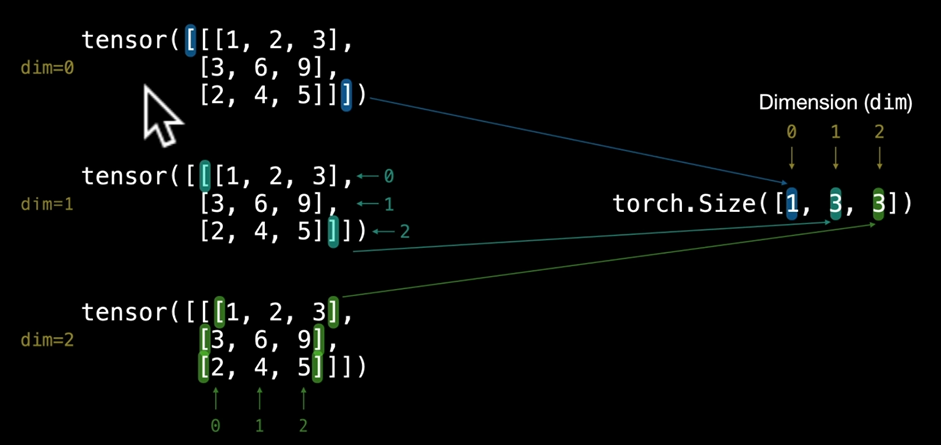

In [ ]:
TENSOR2 = torch.tensor([[[1,2,3],
                         [4,5,6],
                         [7,8,9]],
                        [[9,8,7],
                         [6,5,4],
                         [3,2,1]]])
TENSOR2

tensor([[[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]],

        [[9, 8, 7],
         [6, 5, 4],
         [3, 2, 1]]])

In [ ]:
TENSOR2[1]

tensor([[9, 8, 7],
        [6, 5, 4],
        [3, 2, 1]])

In [ ]:
# ahora, el tensor tiene 2 tensores de 3x3
TENSOR2.shape

torch.Size([2, 3, 3])

## Creando tensores con valores aleatorios

Los tensores aleatorios son importantes porque la manera en que muchas redes neuronales aprenden es empezando con tensores de valores aleatorios y luego ajustando esos valores para representar mejor la data.

"Empezar con números aleatorios -> mirar la data -> actualizar números aleatorios -> mirar la dara -> actualizar números aleatorios..."

In [ ]:
random_tensor = torch.rand(3,4)
random_tensor

tensor([[0.3323, 0.5095, 0.6866, 0.1313],
        [0.9258, 0.6658, 0.2901, 0.2081],
        [0.7286, 0.2162, 0.5521, 0.4422]])

In [ ]:
# Creamos un tensor aleatorio con dimensiones similares a las de una imagen
random_image_size_tensor = torch.rand(size = (3, 224, 224))
random_image_size_tensor.shape, random_image_size_tensor.ndim

(torch.Size([3, 224, 224]), 3)

## Creando tensores con 1's y 0's

In [ ]:
zeros = torch.zeros(size = (3,4))
zeros

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])

In [ ]:
zeros * random_tensor

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])

In [ ]:
ones = torch.ones(size = (3,4))
ones

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])

## Creando tensores a partir de un rango

In [ ]:
one_to_ten = torch.arange(1, 11)
one_to_ten

tensor([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [ ]:
step_by_step = torch.arange(start = 0, end = 1000, step = 82)
step_by_step

tensor([  0,  82, 164, 246, 328, 410, 492, 574, 656, 738, 820, 902, 984])

## Creando tensores a partir de otros tensores

In [ ]:
ten_zeros = torch.zeros_like(input = one_to_ten)
ten_zeros

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

# Tensor datatypes

**Note:** los 3 errores más frecuentes con PyTorch y deep learning son:

1. Los tensores no son del datatype correcto (si tenemos un tensor float16 y tratamos de computarlo con un float32, pueden saltar errores).
2. Los tensores no tienen la forma correcta (shape)
3. Los tensores no están en el dispositivo correcto (si intentas hacer operaciones entre dos tensores que no están en el mismo dispositivo [cpu, gpu], pytorch tirará un error)

In [ ]:
# aunque especifiquemos que el dtype del tensor es None, va a ser float32 igual porque ese es el dtype default de los tensores en pytorch
float_32_tensor = torch.tensor([3.0, 6.0, 9.0], 
                               dtype=None)#, device=None, requires_grad=False)
float_32_tensor.dtype

torch.float32

In [ ]:
float_32_tensor = torch.tensor([3.0, 6.0, 9.0], 
                               dtype=None, # datatype del tensor, i.e. float32, float16, etc.
                               device=None, # dispositivo en el que está el tensor (CPU, GPU, cuda, etc). Por defecto es "cpu"
                               requires_grad=False) # si quieres que pytorch trackee los gradientes de los tensores, aplica para ciertos cálculos

In [ ]:
float_16_tensor = float_32_tensor.type(torch.float16)
float_16_tensor.dtype

torch.float16

In [ ]:
float_16_tensor * float_32_tensor # en este caso funciona aunque los dtypes sean distintos, pero en otros cálculos puede haber errores

tensor([ 9., 36., 81.])

In [ ]:
# el resultado es float32
a = float_16_tensor * float_32_tensor
a.dtype

torch.float32

# Atributos de los tensores
1. Los tensores no son del datatype correcto -> usar **'tensor.dtype'**
2. Los tensores no tienen la forma correcta -> usar **'tensor.shape'**
3. Los tensores no están en el dispositivo correcto -> usar **'tensor.device'**

In [ ]:
some_tensor = torch.rand(3,4)
print(some_tensor)
print(f"Datatype of tensor: {some_tensor.dtype}")
print(f"Shape of tensor: {some_tensor.shape}")
print(f"Device tensor is on: {some_tensor.device}")

tensor([[0.9104, 0.7736, 0.7067, 0.1713],
        [0.3008, 0.8500, 0.4596, 0.4952],
        [0.4572, 0.4644, 0.0640, 0.5920]])
Datatype of tensor: torch.float32
Shape of tensor: torch.Size([3, 4])
Device tensor is on: cpu


# Multiplicación de matrices

## Diferencia entre función de pytorch y algoritmo normal
Las funciones de pytorch son brutalmente más rápidas

In [ ]:
tensor = torch.tensor([1, 2, 3])
tensor.shape

torch.Size([3])

In [ ]:
%%time
# Matrix multiplication by hand 
# (avoid doing operations with for loops at all cost, they are computationally expensive)
value = 0
for i in range(len(tensor)):
  value += tensor[i] * tensor[i]
value

CPU times: user 2.2 ms, sys: 27 µs, total: 2.23 ms
Wall time: 4.62 ms


tensor(14)

In [ ]:
%%time
torch.matmul(tensor, tensor)

CPU times: user 905 µs, sys: 0 ns, total: 905 µs
Wall time: 841 µs


tensor(14)

# Reshaping, viewing, stacking, squeezing and unsqueezing tensors

* **Reshaping**: cambia la forma de un tensor
* **Viewing**: devuelve una vista de un tensor de una forma distinta pero sin cambiar la original
* **Stacking**: combina múltiples tensores uno encima de otro (vstack) o uno al lado del otro (hstack)
* **Squeeze**: remuve todos los 1-dimension de un tensor
* **Unsqueeze**: añade un 1-dimension a un tensor
* **Permute**: Retorna una vista del tensor con dimensiones cambiadas

In [ ]:
# tensor de ejemplo
x = torch.arange(1., 10.)
x, x.shape

(tensor([1., 2., 3., 4., 5., 6., 7., 8., 9.]), torch.Size([9]))

In [ ]:
# añadir una dimension extra
x_reshaped = x.reshape(1,9) # de esta manera le agregamos otra dimension
x_reshaped, x_reshaped.shape

# visto de cierta manera, se podría decir que es una lista que contiene 1 lista de 9 elementos (1,9)

(tensor([[1., 2., 3., 4., 5., 6., 7., 8., 9.]]), torch.Size([1, 9]))

In [ ]:
# añadir una dimension extra
x_reshaped_2 = x_reshaped.reshape(9,1) # de esta manera le agregamos otra dimension
x_reshaped_2, x_reshaped_2.shape

# ahora obtenemos algo así como una lista con 9 listas de un elemento (9,1)

(tensor([[1.],
         [2.],
         [3.],
         [4.],
         [5.],
         [6.],
         [7.],
         [8.],
         [9.]]), torch.Size([9, 1]))

In [ ]:
x = torch.zeros(2, 1, 2, 1, 2)
x.size()

torch.Size([2, 1, 2, 1, 2])

In [ ]:
x

tensor([[[[[0., 0.]],

          [[0., 0.]]]],



        [[[[0., 0.]],

          [[0., 0.]]]]])

In [ ]:
y = torch.squeeze(x)
y.size()


torch.Size([2, 2, 2])

In [ ]:
y

tensor([[[0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.]]])

In [ ]:
torch.cuda.is_available()

True

In [ ]:
torch.cuda.device_count()

1